<a href="https://colab.research.google.com/github/blacker32/llm_repo/blob/master/finance_analis-v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">FIZ 4901E</h2>
<h3 align="center">Physics Engeering Design I</h3>
<h3 align="center">Financial Forecasting with AI: Transformer Models' Role in Analyzing Twitter and Stock Correlations</h3>
<div align="center">
<br>
<div style="text-align: left; padding-left: 15px; padding-right: 20px;">
    <p style="text-align: left;">
        Gökay Akçay <strong>090200147</strong>
        <br>
        <strong>Supervisor:</strong> Prof Dr. Emre Onur Kahya    
    </p>
</div>

<br>

<div style="padding-left: 20px; padding-right: 20px;">
    <h2 align="center"><strong>Explanation</strong></h2>
    <hr>
    <p align="center">
      This study aims to establish a compelling correlation between sentiment scores derived from financial text data and the values of stock prices. This will be achieved by demonstrating the fluctuations in stock prices over various time periods in relation to the emotional scores found from relevant financial texts. To validate the result, the price of the stock will be examined in different time scales with different validation metrics. In addition, the effectiveness of sentiment score points over different time intervals, the influence of specific scores on prices, and the utilization of sentimental scores in various algorithms for price prediction will also be examined.
    </p>
    <hr>
</div>

<div align="center">
    <img
        src = "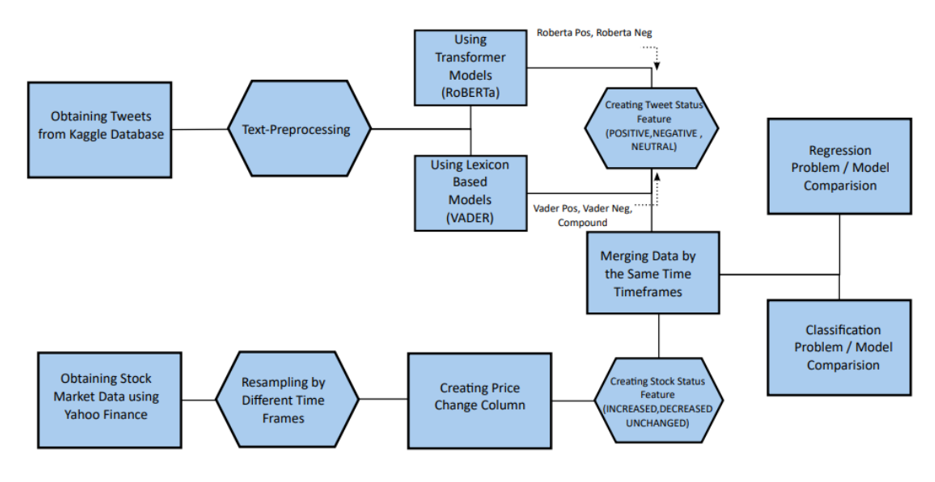 "
         alt="Chart" width="600" height="600">
</div>

### Importing data <a name="data-acquisition"></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
import csv
import matplotlib.dates as mdates
import yfinance as yf

In [ ]:
tweets_df = pd.read_csv("stock_tweets.csv", parse_dates=['Date'])

# Extract year, month, day, etc. into separate columns
tweets_df['Year'] = tweets_df['Date'].dt.year
tweets_df['Month'] = tweets_df['Date'].dt.month
tweets_df['Day'] = tweets_df['Date'].dt.day
tweets_df['Hour'] = tweets_df['Date'].dt.hour
tweets_df['Minute'] = tweets_df['Date'].dt.minute
tweets_df['Second'] = tweets_df['Date'].dt.second
tweets_df['DayOfWeek'] = tweets_df['Date'].dt.dayofweek
tweets_df['DateTime'] = tweets_df['Date'].dt.date
tweets_df["DateTime"] = pd.to_datetime(tweets_df["DateTime"], format='%Y-%m-%d')

In [ ]:
tweets_df.head()

,Date,Tweet,Stock Name,Company Name,Year,Month,Day,Hour,Minute,Second,DayOfWeek,DateTime
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",2022,9,29,23,41,16,3,2022-09-29
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",2022,9,29,23,24,43,3,2022-09-29
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",2022,9,29,23,18,8,3,2022-09-29
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",2022,9,29,22,40,7,3,2022-09-29
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",2022,9,29,22,27,5,3,2022-09-29


### Null Checking & Uniquiness

In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          80793 non-null  datetime64[ns, UTC]
 1   Tweet         80793 non-null  object             
 2   Stock Name    80793 non-null  object             
 3   Company Name  80793 non-null  object             
 4   Year          80793 non-null  int64              
 5   Month         80793 non-null  int64              
 6   Day           80793 non-null  int64              
 7   Hour          80793 non-null  int64              
 8   Minute        80793 non-null  int64              
 9   Second        80793 non-null  int64              
 10  DayOfWeek     80793 non-null  int64              
 11  DateTime      80793 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(7), object(3)
memory usage: 7.4+ MB


In [ ]:
tweets_df.nunique()

Date            64424
Tweet           64479
Stock Name         25
Company Name       25
Year                2
Month              12
Day                31
Hour               24
Minute             60
Second             60
DayOfWeek           7
DateTime          365
dtype: int64

In [ ]:
tweets_df.describe()

,Year,Month,Day,Hour,Minute,Second,DayOfWeek
count,80793.000000,80793.000000,80793.000000,80793.000000,80793.000000,80793.000000,80793.000000
mean,2021.735683,6.244984,15.781875,13.821383,28.224883,28.276460,2.718825
std,0.440972,3.572260,9.018146,6.926902,17.577743,17.874323,1.881140
min,2021.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,3.000000,8.000000,10.000000,13.000000,13.000000,1.000000
50%,2022.000000,6.000000,16.000000,15.000000,28.000000,28.000000,3.000000
75%,2022.000000,10.000000,24.000000,19.000000,43.000000,44.000000,4.000000
max,2022.000000,12.000000,31.000000,23.000000,59.000000,59.000000,6.000000


### EDA's & Plots

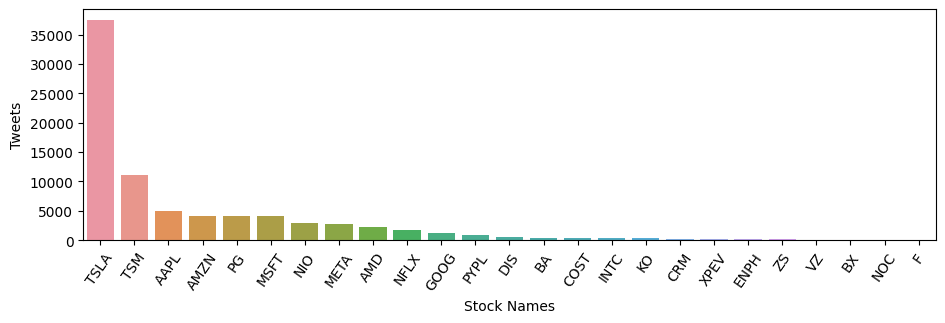

In [ ]:
df_tweet_ordered = tweets_df.groupby("Stock Name").count().sort_values("Tweet",ascending = False).reset_index()
fig,ax = plt.subplots(1,1,figsize=(11,3))
ax = sns.barplot(data = df_tweet_ordered, x = "Stock Name", y = "Tweet")
plt.xlabel("Stock Names")
plt.ylabel("Tweets")
fig = plt.xticks(rotation = 55)

Overall look to tweet distributions

In [ ]:
date_range_distributions = tweets_df.groupby("Stock Name").Date.agg(["count","min","max"]).sort_values(by = "count",ascending = False)
date_range_distributions.head(3)

,count,min,max
Stock Name,,,
TSLA,37422,2021-09-30 01:16:13+00:00,2022-09-29 23:41:16+00:00
TSM,11034,2021-09-30 00:13:26+00:00,2022-09-29 22:23:02+00:00
AAPL,5056,2021-09-30 10:19:31+00:00,2022-09-29 22:23:54+00:00


In [ ]:
tweets_df[tweets_df["Stock Name"] == "TSLA"]

,Date,Tweet,Stock Name,Company Name,Year,Month,Day,Hour,Minute,Second,DayOfWeek,DateTime
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",2022,9,29,23,41,16,3,2022-09-29
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",2022,9,29,23,24,43,3,2022-09-29
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",2022,9,29,23,18,8,3,2022-09-29
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",2022,9,29,22,40,7,3,2022-09-29
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",2022,9,29,22,27,5,3,2022-09-29
...,...,...,...,...,...,...,...,...,...,...,...,...
37417,2021-09-30 02:52:38+00:00,Playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc.",2021,9,30,2,52,38,3,2021-09-30
37418,2021-09-30 02:40:26+00:00,I agree with @freshjiva that $TSLA ‘s EV busin...,TSLA,"Tesla, Inc.",2021,9,30,2,40,26,3,2021-09-30
37419,2021-09-30 01:59:02+00:00,Hold. On. Tight. $TSLA,TSLA,"Tesla, Inc.",2021,9,30,1,59,2,3,2021-09-30
37420,2021-09-30 01:38:26+00:00,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,TSLA,"Tesla, Inc.",2021,9,30,1,38,26,3,2021-09-30


In [ ]:
tweets_df.groupby(["Stock Name","DateTime"]).DateTime.agg(["count"]).reset_index(drop=False)

,Stock Name,DateTime,count
0,AAPL,2021-09-30,7
1,AAPL,2021-10-01,11
2,AAPL,2021-10-02,4
3,AAPL,2021-10-03,1
4,AAPL,2021-10-04,10
...,...,...,...
5905,ZS,2022-09-18,1
5906,ZS,2022-09-21,1
5907,ZS,2022-09-27,1
5908,ZS,2022-09-28,1


Since TSLA, has the most tweets, we will continue with TSLA to predict

#### Tweet amounts for each stock day by day

In [ ]:
tweets_by_day = tweets_df.groupby(["Stock Name","DateTime"]).DateTime.agg(["count"]).reset_index(drop=False)
tweets_by_day["DateTime"] = pd.to_datetime(tweets_by_day["DateTime"], format='%Y-%m-%d')

tweets_by_day.rename(columns={'count': 'Amount'}, inplace=True)

In [ ]:
stock_name = 'TSLA' #This part affects all lines after this line.
#Choose a stock to predict. Since TSLA has the most data. I choose by default
stock_yf = yf.Ticker(stock_name)
# get historical market data
hist = stock_yf.history(period="max").reset_index()

In [ ]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          3417 non-null   datetime64[ns, America/New_York]
 1   Open          3417 non-null   float64                         
 2   High          3417 non-null   float64                         
 3   Low           3417 non-null   float64                         
 4   Close         3417 non-null   float64                         
 5   Volume        3417 non-null   int64                           
 6   Dividends     3417 non-null   float64                         
 7   Stock Splits  3417 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 213.7 KB


In [ ]:
hist.columns.to_list()

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

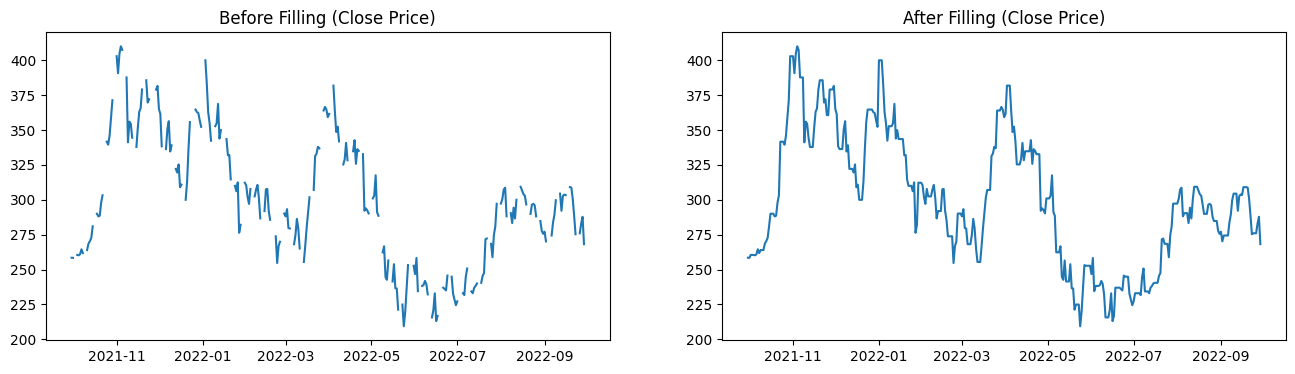

In [ ]:
stock_prices = hist[(hist['Date'] >= date_range_distributions.loc[stock_name]['min']) & (hist['Date'] <= date_range_distributions.loc[stock_name]['max'])]
stock_prices = stock_prices.set_index("Date")

stock_prices_daily = stock_prices.resample("D").agg({'High': 'max', 'Close': 'last', 'Open': 'first'})
stock_prices_daily.isnull().count()

fig,axs = plt.subplots(1,2,figsize = (16,4))

axs[0].set_title("Before Filling (Close Price)")
axs[0].plot(stock_prices_daily.Close)

stock_prices_daily.fillna(method = "bfill",inplace = True)

axs[1].set_title("After Filling (Close Price)")
axs[1].plot(stock_prices_daily.Close)

In [ ]:
stock_prices['DateTime'] = stock_prices.index.date
stock_prices_daily['DateTime'] = stock_prices_daily.index.date
stock_prices_daily["DateTime"] = pd.to_datetime(stock_prices_daily["DateTime"], format='%Y-%m-%d')

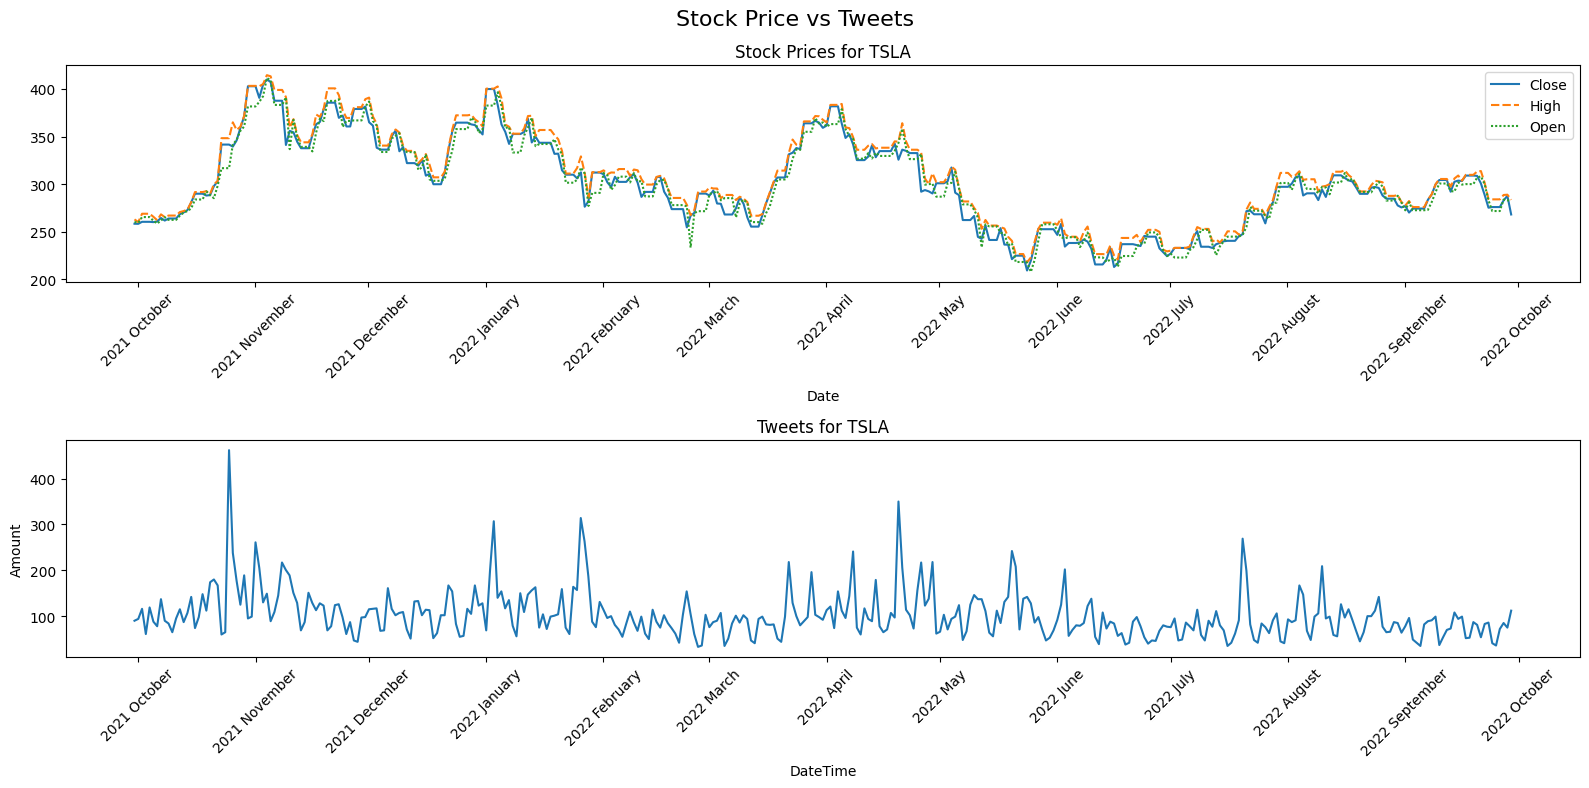

In [ ]:
fig,axs = plt.subplots(2,1,figsize=(16,8))

fig.suptitle('Stock Price vs Tweets', fontsize=16)

sns.lineplot(data = stock_prices_daily[['Close','High','Open']],ax = axs[0])
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y %B'))
axs[0].set_title(f"Stock Prices for {stock_name}")
axs[0].tick_params(axis='x', rotation=45)


stock_tweets = tweets_by_day[tweets_by_day["Stock Name"] == stock_name]

sns.lineplot(x = stock_tweets["DateTime"],y = stock_tweets["Amount"], ax = axs[1])
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].set_title(f"Tweets for {stock_name}")
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y %B'))
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()



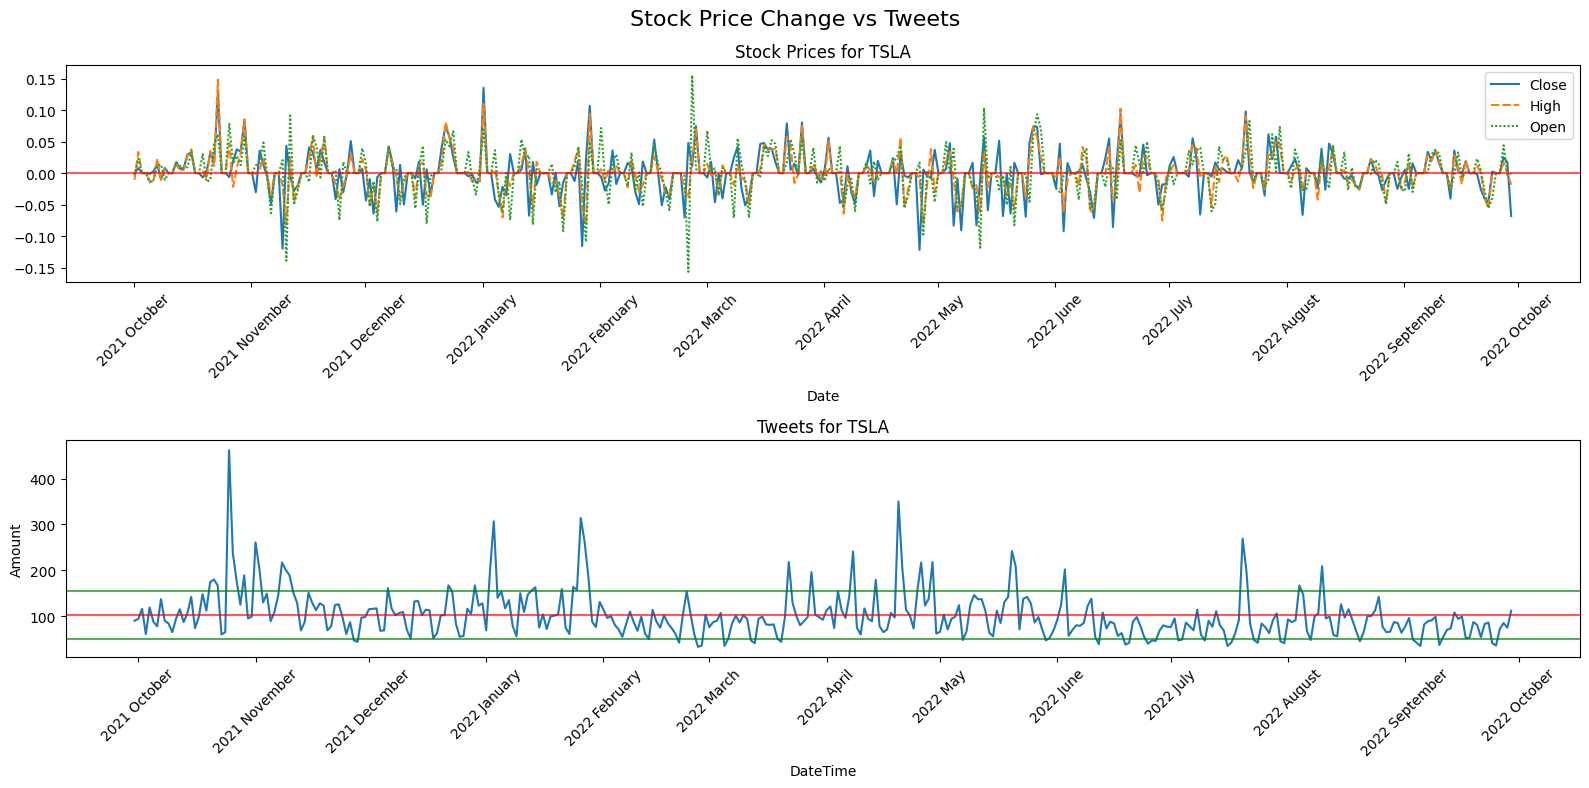

In [ ]:
fig,axs = plt.subplots(2,1,figsize=(16,8))

fig.suptitle('Stock Price Change vs Tweets', fontsize=16)

sns.lineplot(data = stock_prices_daily[['Close','High','Open']].pct_change(),ax = axs[0])
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y %B'))

axs[0].axhline(y = 0, color = 'r', linestyle = '-',alpha = 0.65)

axs[0].set_title(f"Stock Prices for {stock_name}")
axs[0].tick_params(axis='x', rotation=45)

stock_tweets = tweets_by_day[tweets_by_day["Stock Name"] == stock_name]

mean,std = stock_tweets['Amount'].agg(['mean','std'])

sns.lineplot(x = stock_tweets["DateTime"],y = stock_tweets["Amount"], ax = axs[1])
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].set_title(f"Tweets for {stock_name}")
axs[1].axhline(y = mean + std, color = 'g', linestyle = '-',alpha = 0.65)
axs[1].axhline(y = mean, color = 'r', linestyle = '-',alpha = 0.65)
axs[1].axhline(y = mean - std, color = 'g', linestyle = '-',alpha = 0.65)

axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y %B'))
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

### Classifying Closing Prices

If price is positively changed set categorical value to INCREASED, or DECREASED else UNCHANGED

In [ ]:
stock_prices['Close Change'] = stock_prices_daily['Close'].pct_change()
stock_prices_daily['Close Change'] = stock_prices_daily['Close'].pct_change()

In [ ]:
labels = ['DECREASED', 'UNCHANGED','INCREASED']
bins = [-float('inf'), -0.02,0.02, float('inf')]
stock_prices_daily['Stock Status'] = pd.cut(stock_prices_daily['Close Change'], bins=bins, labels=labels, include_lowest=True)
stock_prices_daily.loc[stock_prices_daily['Close Change'] == 0,"Stock Status"] = "UNCHANGED"

In [ ]:
stock_tweets = tweets_df[tweets_df['Stock Name'] == 'TSLA']

In [ ]:
stock_tweets['Date'] = stock_tweets['Date'].dt.strftime('%Y-%m-%d')

C:\Users\Gokay\AppData\Local\Temp\ipykernel_12368\938307987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_tweets['Date'] = stock_tweets['Date'].dt.strftime('%Y-%m-%d')


In [ ]:
tweets_vs_stock = pd.merge(stock_tweets,stock_prices_daily[['DateTime','Close','High','Open','Stock Status','Close Change']],on = 'DateTime',how = "left")

## Sentimental Analysis

### Importing NLTK

In [ ]:
!pip install -q nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt', quiet=True)
nltk.download('words', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('maxent_ne_chunker', quiet=True)
nltk.download('vader_lexicon', quiet=True)

True

In [ ]:
tweets_only = stock_tweets.Tweet.reset_index(drop = True)

In [ ]:
tokens = nltk.word_tokenize(tweets_only[0])
tokens[:10]

['Mainstream',
 'media',
 'has',
 'done',
 'an',
 'amazing',
 'job',
 'at',
 'brainwashing',
 'people']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:5]

[('Mainstream', 'NNP'),
 ('media', 'NNS'),
 ('has', 'VBZ'),
 ('done', 'VBN'),
 ('an', 'DT')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged[:5])
entities.pprint()

(S (GPE Mainstream/NNP) media/NNS has/VBZ done/VBN an/DT)


### Vader (Valence Aware Dictionary and sentiment Reasoner) Model

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
res = {}
idx = 0
for text in tqdm(tweets_only):
    score = sia.polarity_scores(text)
    res[idx] = score
    idx+=1

  0%|          | 0/37422 [00:00<?, ?it/s]

In [ ]:
vaders_res_df = pd.DataFrame(res).T
vaders_res_df = vaders_res_df.rename(columns={'neg': 'vader_neg', 'neu': 'vader_neu','pos':'vader_pos'})

In [ ]:
vaders_res_df

,vader_neg,vader_neu,vader_pos,compound
0,0.127,0.758,0.115,0.0772
1,0.000,1.000,0.000,0.0000
2,0.000,0.951,0.049,0.2960
3,0.273,0.590,0.137,-0.7568
4,0.526,0.474,0.000,-0.8750
...,...,...,...,...
37417,0.197,0.656,0.148,-0.1531
37418,0.078,0.747,0.175,0.5719
37419,0.000,1.000,0.000,0.0000
37420,0.000,0.743,0.257,0.4215


In [ ]:
tweets_and_scores = pd.concat([stock_tweets,vaders_res_df],axis = 1)

### RoBERTa (A Robustly Optimized BERT Pretraining Approach) Model

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_path = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path).to(device)

In [ ]:
res = {}
idx = 0

for text in tqdm(tweets_only):
    encoded_text = tokenizer(text, return_tensors='pt').to(device)  # Move input to the same device as the model
    with torch.no_grad():  # Disable gradient computation for inference
        output = model(**encoded_text)
        scores = output.logits[0].detach().cpu().numpy()  # Move output back to CPU for further processing
        scores = softmax(scores)
        scores_dict = {"neg": scores[0], "neu": scores[1], "pos": scores[2]}
        res[idx] = scores_dict
    idx += 1

  0%|          | 0/37422 [00:00<?, ?it/s]

In [ ]:
roberta_res_df = pd.DataFrame(res).T
roberta_res_df = roberta_res_df.rename(columns={'neg': 'roberta_neg', 'neu': 'roberta_neu','pos':'roberta_pos'})

In [ ]:
tweets_and_scores = pd.concat([tweets_vs_stock,vaders_res_df,roberta_res_df],axis = 1).set_index('Date')

In [ ]:
tweets_and_scores.index = pd.to_datetime(tweets_and_scores.index)

### Classifying Tweet Sentimental Scores

In [ ]:
tweets_and_scores['compound'].mean() + tweets_and_scores['compound'].std()

0.6001075946406537

In [ ]:
positive_compound_limit = tweets_and_scores['compound'].mean()
negative_compound_limit = -tweets_and_scores['compound'].mean()

positive_condition = ((tweets_and_scores['compound'] > positive_compound_limit))
neutral_condition = ((tweets_and_scores['compound'] >= negative_compound_limit) & (tweets_and_scores['compound'] <= positive_compound_limit))
negative_condition = ((tweets_and_scores['compound'] < negative_compound_limit))

labels = ['NEGATIVE', 'NEUTRAL','POSITIVE']

bins = [negative_compound_limit, 0,0.000001,positive_compound_limit]

tweets_and_scores['Tweet Status'] = pd.cut(tweets_and_scores['compound'], bins=bins, labels=labels, include_lowest=True)

tweets_and_scores.loc[neutral_condition,"Tweet Status"] = "NEUTRAL"
tweets_and_scores.loc[positive_condition,"Tweet Status"] = "POSITIVE"
tweets_and_scores.loc[negative_condition,"Tweet Status"] = "NEGATIVE"

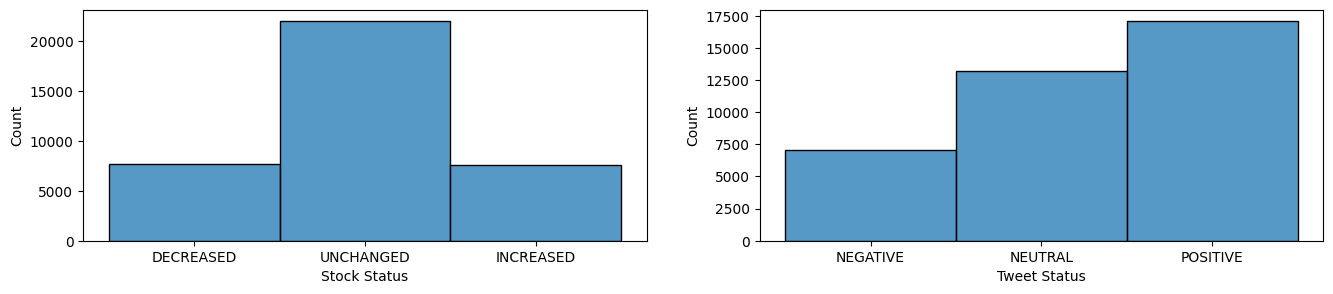

In [ ]:
fig,axs = plt.subplots(1,2,figsize = (16,3))

sns.histplot(tweets_and_scores['Stock Status'],ax = axs[0])
sns.histplot(tweets_and_scores['Tweet Status'],ax = axs[1])
plt.show()

In [ ]:
stock_vs_tweet_status = tweets_and_scores

In [ ]:
stocks_vs_pos_negs = stock_vs_tweet_status[(stock_vs_tweet_status['Stock Status'] == 'INCREASED' )|(stock_vs_tweet_status['Stock Status'] == 'DECREASED') ]

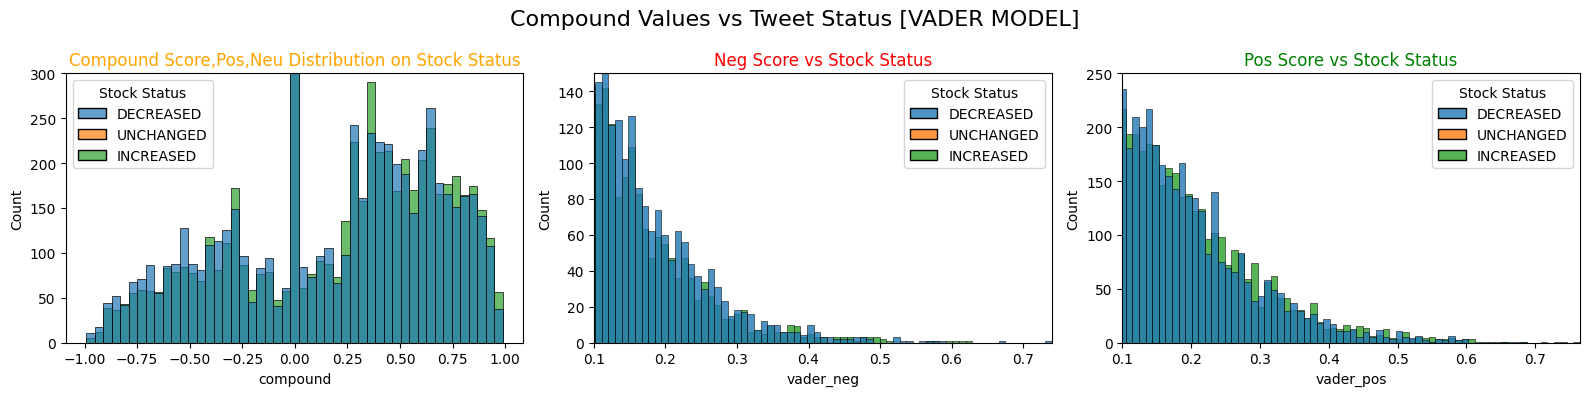

In [ ]:
fig,axs = plt.subplots(1,3,figsize = (16,4))
fig.suptitle('Compound Values vs Tweet Status [VADER MODEL]', fontsize=16)

axs[0].set_ylim(0,300)
axs[0].set_title('Compound Score,Pos,Neu Distribution on Stock Status', c = 'orange')
sns.histplot(data = stocks_vs_pos_negs, x = 'compound', hue = 'Stock Status', ax = axs[0], alpha = 0.7)

axs[1].set_xlim(0.1,stocks_vs_pos_negs['vader_neg'].max())
axs[1].set_ylim(0,150)
axs[1].set_title('Neg Score vs Stock Status', c = 'r')
sns.histplot(data = stocks_vs_pos_negs,bins=80, x = 'vader_neg', hue = 'Stock Status', ax = axs[1], alpha = 0.8)


axs[2].set_xlim(0.1,stocks_vs_pos_negs['vader_pos'].max())
axs[2].set_ylim(0,250)
axs[2].set_title('Pos Score vs Stock Status', c = 'g')
sns.histplot(data = stocks_vs_pos_negs,bins = 80, x = 'vader_pos', hue = 'Stock Status', ax = axs[2], alpha = 0.8)

fig.tight_layout()

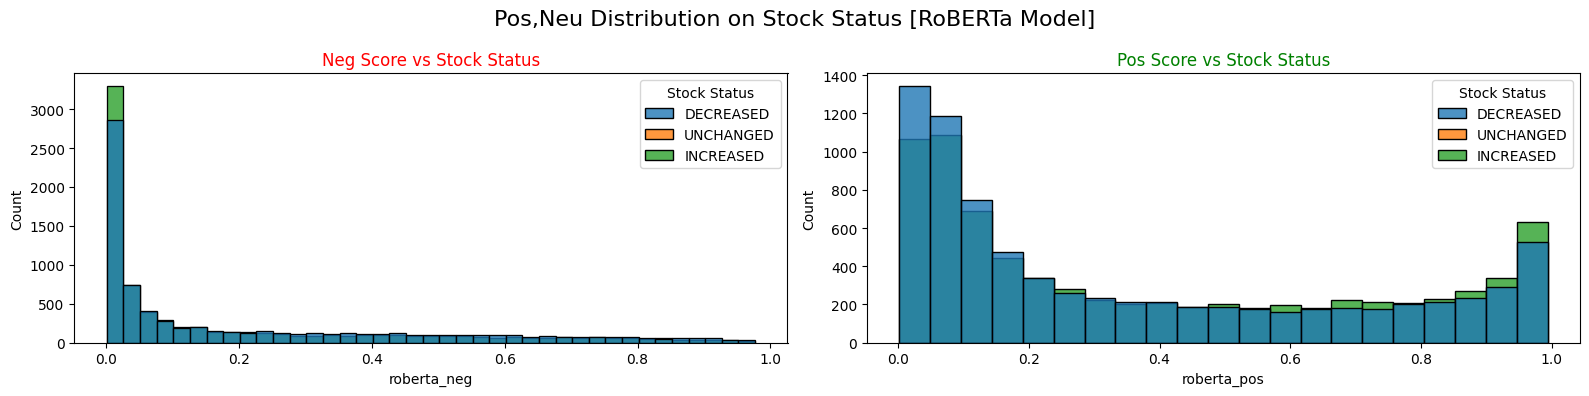

In [ ]:
fig,axs = plt.subplots(1,2,figsize = (16,4))
fig.suptitle('Pos,Neu Distribution on Stock Status [RoBERTa Model]', fontsize=16)

axs[0].set_title('Neg Score vs Stock Status', c = 'r')
sns.histplot(data = stocks_vs_pos_negs, x = 'roberta_neg', hue = 'Stock Status', ax = axs[0],alpha = 0.8)

axs[1].set_title('Pos Score vs Stock Status', c = 'g')
sns.histplot(data = stocks_vs_pos_negs, x = 'roberta_pos', hue = 'Stock Status', ax = axs[1],alpha = 0.8)


fig.tight_layout()

### Overall View on Correlation between Compound Scores and Price Changes

In [ ]:
compared_metric = 'compound'

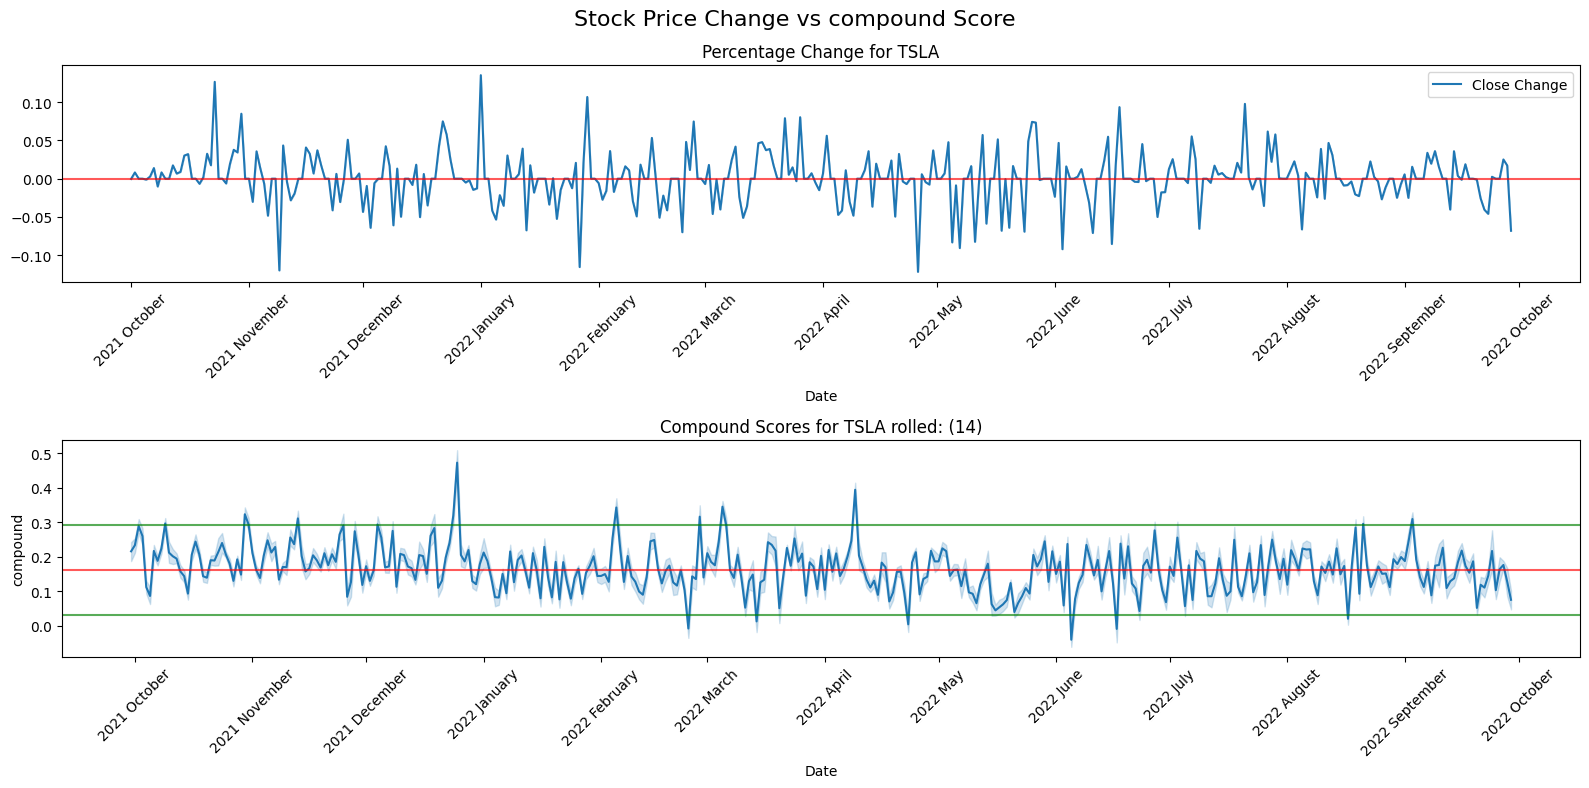

In [ ]:
fig,axs = plt.subplots(2,1,figsize=(16,8))

fig.suptitle(f'Stock Price Change vs {compared_metric} Score', fontsize=16)

sns.lineplot(data = stock_vs_tweet_status[['Close Change']],ax = axs[0])
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y %B'))

axs[0].axhline(y = 0, color = 'r', linestyle = '-',alpha = 0.65)

axs[0].set_title(f"Percentage Change for {stock_name}")
axs[0].tick_params(axis='x', rotation=45)


_window = 14
stock_vs_tweet_status_rolled = stock_vs_tweet_status[compared_metric].rolling(window = _window).mean()
mean,std = stock_vs_tweet_status_rolled.agg(['mean','std'])

sns.lineplot(data = stock_vs_tweet_status_rolled, ax = axs[1])
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].set_title(f"Compound Scores for {stock_name} rolled: ({_window})")
axs[1].axhline(y = mean + std, color = 'g', linestyle = '-',alpha = 0.65)
axs[1].axhline(y = mean, color = 'r', linestyle = '-',alpha = 0.65)
axs[1].axhline(y = mean-std, color = 'g', linestyle = '-',alpha = 0.65)

axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y %B'))
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

#### Inspecting Scores on Price Different Time Frames

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
compared_metric = 'compound'

In [ ]:
scores = stock_vs_tweet_status.resample('7D')['roberta_pos','roberta_neg','vader_pos','vader_neg','compound'].mean()

In [ ]:
stock_prices.index = pd.to_datetime(pd.to_datetime(stock_prices.index).strftime('%Y-%m-%d'))
stock_prices_daily.index = pd.to_datetime(pd.to_datetime(stock_prices_daily.index).strftime('%Y-%m-%d'))

In [ ]:
def resample_tweets_and_scores(time_scale = "1D"):
    dates = tweets_and_scores.index.unique()
    scores = tweets_and_scores.resample(time_scale)['compound','vader_pos','vader_neg','roberta_pos','roberta_neg'].mean()


    tweets_and_scores_resampled = pd.DataFrame(index = dates,data = scores)

    close_changes = stock_prices_daily['Close Change'].resample(time_scale).sum()

    close_prices = stock_prices_daily['Close'].resample(time_scale).mean()

    tweets_and_scores_resampled['Close Change'] = close_changes
    tweets_and_scores_resampled['Close'] = close_prices
    scores_and_prices = tweets_and_scores_resampled
    return scores_and_prices

In [ ]:
scaler = MinMaxScaler()
stock_vs_tweet_status_daily = resample_tweets_and_scores("1D")[['Close Change',compared_metric]].dropna()
stock_vs_tweet_status_weekly = resample_tweets_and_scores("7D")[['Close Change',compared_metric]].dropna()
stock_vs_tweet_status_twoweeks = resample_tweets_and_scores("14D")[['Close Change',compared_metric]].dropna()
stock_vs_tweet_status_monthly = resample_tweets_and_scores('30D')[['Close Change',compared_metric]].dropna()

stock_vs_tweet_status_daily_normalized = pd.DataFrame(scaler.fit_transform(stock_vs_tweet_status_daily), columns=['Close Change',compared_metric])
stock_vs_tweet_status_weekly_normalized = pd.DataFrame(scaler.fit_transform(stock_vs_tweet_status_weekly), columns=['Close Change',compared_metric])
stock_vs_tweet_status_twoweeks_normalized = pd.DataFrame(scaler.fit_transform(stock_vs_tweet_status_twoweeks), columns=['Close Change',compared_metric])
stock_vs_tweet_status_monthly_normalized = pd.DataFrame(scaler.fit_transform(stock_vs_tweet_status_monthly), columns=['Close Change',compared_metric])

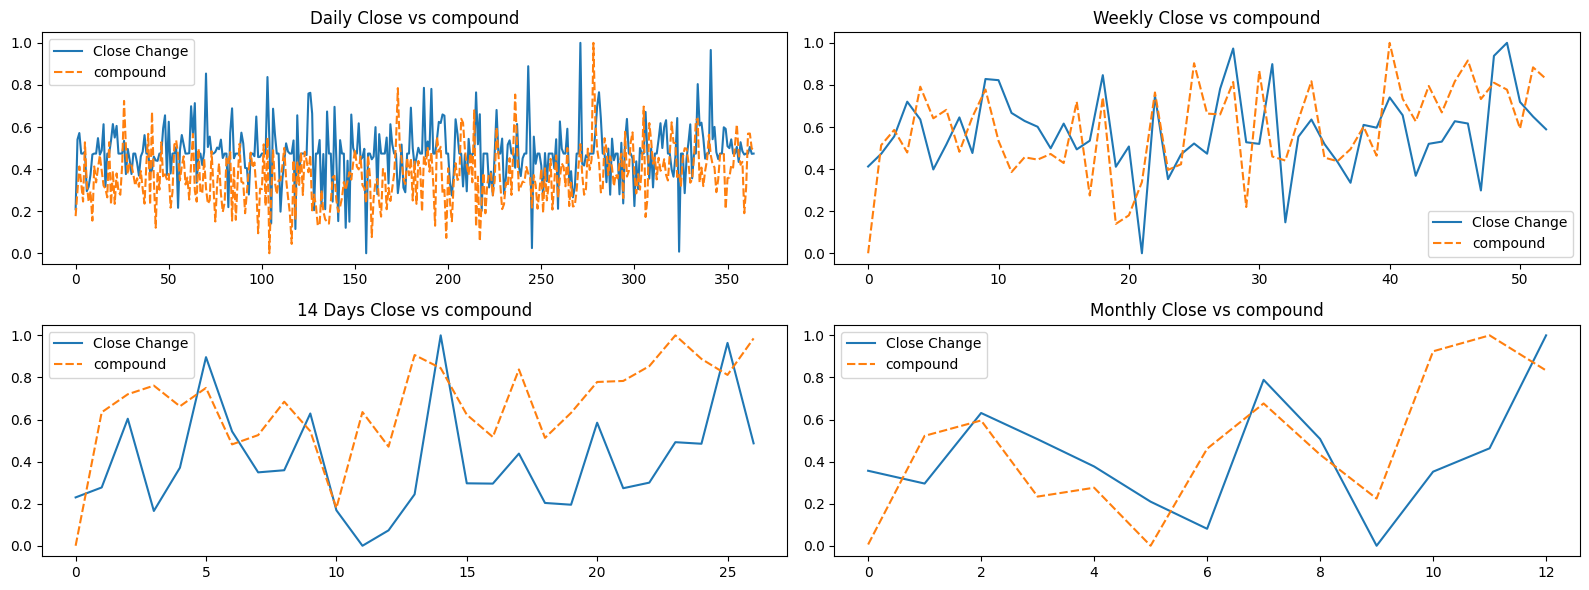

In [ ]:
fig,axs = plt.subplots(2,2,figsize = (16,6))

sns.lineplot(data = stock_vs_tweet_status_daily_normalized,ax = axs[0,0])
axs[0,0].set_title(f'Daily Close vs {compared_metric}')
sns.lineplot(data = stock_vs_tweet_status_weekly_normalized,ax = axs[0,1])
axs[0,1].set_title(f'Weekly Close vs {compared_metric}')
sns.lineplot(data = stock_vs_tweet_status_twoweeks_normalized,ax = axs[1,0])
axs[1,0].set_title(f'14 Days Close vs {compared_metric}')
sns.lineplot(data = stock_vs_tweet_status_monthly_normalized,ax = axs[1,1])
axs[1,1].set_title(f'Monthly Close vs {compared_metric}')

plt.tight_layout()

#### Pearson Correlation

In [ ]:
from scipy.stats import pearsonr

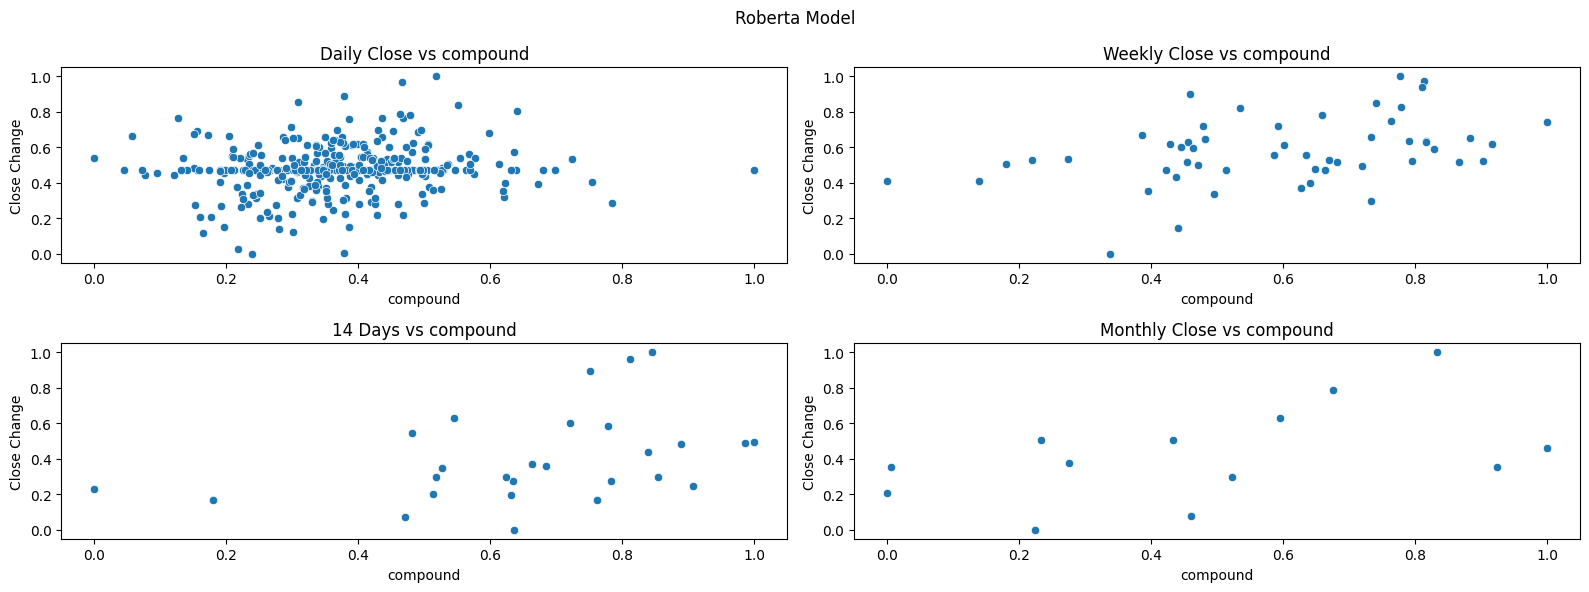

In [ ]:
fig,axs = plt.subplots(2,2,figsize = (16,6))

fig.suptitle('Roberta Model')
sns.scatterplot(data = stock_vs_tweet_status_daily_normalized,x = compared_metric, y = 'Close Change',ax = axs[0,0])
axs[0,0].set_title(f'Daily Close vs {compared_metric}')
sns.scatterplot(data = stock_vs_tweet_status_weekly_normalized,x = compared_metric, y = 'Close Change',ax = axs[0,1])
axs[0,1].set_title(f'Weekly Close vs {compared_metric}')
sns.scatterplot(data = stock_vs_tweet_status_twoweeks_normalized,x = compared_metric, y = 'Close Change',ax = axs[1,0])
axs[1,0].set_title(f'14 Days vs {compared_metric}')
sns.scatterplot(data = stock_vs_tweet_status_monthly_normalized,x = compared_metric, y = 'Close Change',ax = axs[1,1])
axs[1,1].set_title(f'Monthly Close vs {compared_metric}')

plt.tight_layout()

In [ ]:
def get_pearson_correlations(time_scales = []):
    print(f'{compared_metric}-price_change pearson scores: \n')
    for timescale in time_scales:
        stock_vs_tweet_status_timescale = resample_tweets_and_scores(timescale)
        stock_vs_tweet_status_timescale = stock_vs_tweet_status_timescale.dropna()
        statistics,pvalue = pearsonr(stock_vs_tweet_status_timescale[compared_metric],stock_vs_tweet_status_timescale['Close Change'])

        print(f'{timescale}\nPearson Coefficient : {statistics},\nP-Value: {pvalue}\n')


In [ ]:
time_scales = ['1D','3D','7D','14D','1M','3M']
get_pearson_correlations(time_scales)

compound-price_change pearson scores: 

1D
Pearson Coefficient : 0.1309790077296321,
P-Value: 0.01226018346071597

3D
Pearson Coefficient : 0.14217102567547268,
P-Value: 0.1182619519230349

7D
Pearson Coefficient : 0.3977673004291606,
P-Value: 0.0031829064164526043

14D
Pearson Coefficient : 0.38218445213288943,
P-Value: 0.04914492501354304

1M
Pearson Coefficient : 0.27154365495577815,
P-Value: 0.39323792356614784

3M
Pearson Coefficient : 0.45918325930485343,
P-Value: 0.5408167406951465



**Summary:**

7D - 14D are the days which have the highest pearson correlation in terms of compound-close changes.

Lets check if these parameters perform better results.


### Frequency of Keywords for Positive and Negative Sentimental Scores

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gokay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweets_and_status = tweets_and_scores[['Tweet','Tweet Status']]

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
financially_negative_words = [
    "Bankruptcy","Default","Insolvency","Liquidation","Foreclosure",
    "Devaluation","Recession","Depreciation","Loss","Default Risk","Downgrade",
    "Crash","Collapse","Plunge","Slump","Deficit","Crisis","Decline","Downturn",
    "Unemployment","Inflation","Debt","Trouble","Stress","Bankruptcy","Penalty",
    "Bankrupt","Lawsuit","Liquidity","Crisis","Setback","Collapse","Weakness",
    "Downfall","Failure","Shortage","Risk","Defaulted","Volatile","Disaster",
    "Writedown","Distress","Plummet","Decline","Liquidate","Debacle","Woes",
    "Downsizing",  "Broke","Flop","Bankrupt","Losing","Fail","Rekt","Dump","Short",
    "Bearish","Weak","Red","Debt","Scam","Collapse","Downslide","Sell-off","Crash",
    "Downfall","Risky","Losses","Dumping","Bear","Bearish"]

financially_positive_words = [
    "long","Profit", "Growth", "Success", "Increase", "Prosperity", "Profitable",
    "Expansion", "Income", "Dividend", "Earnings", "Bonanza", "Upswing",
    "Boom", "Surplus", "Wealth", "Gain", "Affluence", "Robust", "Bullish",
    "Bountiful", "Winning", "Lucrative", "Fulfillment", "Opportunity",
    "Asset", "Plethora", "Benevolent", "Advantage", "Savings", "Benefit",
    "Recovery", "Resilient", "Satisfactory", "Valuable", "Thriving",
    "Optimistic", "Promising", "Bright", "Strong", "Stability",
    "Gains", "Innovation", "Prolific", "Fortune", "Golden", "Blessing",
    "Prospect", "Abundance", "Happiness", "Euphoria", "Victory", "Triumph",
    "Upbeat", "Richness", "Treasure", "Triumphant", "Winner", "Optimism",
    "Prominence", "Favorable", "Fulfilling", "Beneficial", "Successful",
    "Fortunate", "Wealthy", "Prosperous", "Gainer", "Blessed", "Golden",
    "Bright", "Positive", "Pleasure", "Excellent", "High", "Superior",
    "Marvelous", "Outstanding", "Splendid", "Terrific", "Fantastic",
    "Wonderful", "Good", "Great", "Best", "Top", "Leading", "Premier",
    "Elite", "Champion", "Master", "Supreme", "Ultimate", "Unbeatable",
    "Leader", "Hero", "Paradise", "Boom", "Thrive", "Harmony", "Opulent",
    "Abundant", "Prosperous", "Affluence", "Wealthy", "Opulence", "Success",
    "Victory", "Triumph", "Achievement", "Milestone", "Progress",
    "Advancement", "Prosperity", "Accomplished", "Successful", "Progress",
    "Optimal", "Elite", "Champion", "King", "Queen", "Master", "Supreme",
    "Ultimate", "Unbeatable", "Champion", "Elite", "Number One",
    "Leader", "Hero", "Celebrated", "Paradise", "Boom", "Thrive", "Harmony",
    "Opulent", "Abundant", "Prosperous", "Affluence", "Wealthy",
    "Opulence", "Success", "Victory", "Triumph", "Achievement", "Milestone",
    "Progress", "Advancement", "Economic Growth", "Financial Gain",
    "Profits", "Wealth", "Accomplished", "Successful", "Achieving Goals",
    "Prosperity", "Positive", "Optimistic", "Opulent", "Successful",
    "Fulfillment", "Beneficial", "Prosperous", "Positive", "Optimistic",
    "Opulent", "Successful", "Fulfillment", "Beneficial",
    "Profitz", "Growthh", "Successs", "Increassee", "Prosper", "Profitzz",
    "Succesful", "Boost", "Victoryy", "Wealthyy", "Gainz", "Bonanzaa",
    "Happy", "Winz", "Luck", "Richie", "Winningg", "Luckyy", "Joy",
    "Brighttt", "Thrivingg", "Bountyy", "Savings", "Profitzzz",
    "Stonks", "Lambo", "Tothemoon", "ATH", "BTFD", "FOMO", "Yolo", "Bagholder",
    "Gains", "HODL", "Moon", "Green", "Win", "Rich", "Upward", "Bounty",
    "Bullrun", "Whale", "Gains", "Stonks", "Lambo", "Tothemoon", "ATH",
    "BTFD", "FOMO", "Yolo", "Bagholder","Bull"
]

In [ ]:
financially_negative_words = [word.lower() for word in financially_negative_words]
financially_positive_words = [word.lower() for word in financially_positive_words]

In [ ]:
# Initialize empty dictionaries to store the keywords and their frequencies
financially_negative_keywords = {}
financially_positive_keywords = {}
general_negative_keywords = {}
general_positive_keywords = {}

# Define thresholds for negative and positive sentiment (adjust as needed)
negative_threshold = -0.3
positive_threshold = 0.3

# Iterate through each tweet in the list
for text in tweets_and_status['Tweet'].values:
    # Tokenize the text into words/tokens
    text = text.lower()
    tokens = word_tokenize(text)

    # Calculate word frequencies for the current tweet
    freq_dist = FreqDist(tokens)

    # Remove common stop words (if needed)
    stop_words = set(stopwords.words('english'))
    filtered_freq_dist = {word: freq for word, freq in freq_dist.items() if word not in stop_words}

    # Iterate through the filtered words in the current tweet
    for word in filtered_freq_dist.keys():
        word = word.lower()

        # Analyze the sentiment of the word using VADER
        sentiment_scores = analyzer.polarity_scores(word)
        compound_score = sentiment_scores['compound']

        # Check if the word is in the list of financially negative words
        if word in financially_negative_words:
            # Update the financially_negative_keywords dictionary with the word and its frequency
            if word in financially_negative_keywords:
                financially_negative_keywords[word] += filtered_freq_dist[word]
            else:
                financially_negative_keywords[word] = filtered_freq_dist[word]

        # Check if the word is in the list of financially positive words
        elif word in financially_positive_words:
            # Update the financially_positive_keywords dictionary with the word and its frequency
            if word in financially_positive_keywords:
                financially_positive_keywords[word] += filtered_freq_dist[word]
            else:
                financially_positive_keywords[word] = filtered_freq_dist[word]

        # Check if the word has negative sentiment based on the threshold
        if compound_score < -0.3:
            # Update the general_negative_keywords dictionary with the word and its frequency
            if word in general_negative_keywords:
                general_negative_keywords[word] += filtered_freq_dist[word]
            else:
                general_negative_keywords[word] = filtered_freq_dist[word]

        # Check if the word has positive sentiment based on the threshold
        if compound_score > 0.3:
            # Update the general_positive_keywords dictionary with the word and its frequency
            if word in general_positive_keywords:
                general_positive_keywords[word] += filtered_freq_dist[word]
            else:
                general_positive_keywords[word] = filtered_freq_dist[word]

In [ ]:
negative_words_freq = pd.DataFrame({'word':  general_negative_keywords.keys(),'freq': general_negative_keywords.values()})
positive_words_freq = pd.DataFrame({'word': general_positive_keywords.keys(),'freq':general_positive_keywords.values()})

In [ ]:
financially_negative_words_freq = pd.DataFrame({'word': financially_negative_keywords.keys(), 'freq': financially_negative_keywords.values()})
financially_positive_words_freq = pd.DataFrame({'word': financially_positive_keywords.keys(), 'freq': financially_positive_keywords.values()})

In [ ]:
negative_words_freq = negative_words_freq.sort_values(by = 'freq',ascending = False)
positive_words_freq = positive_words_freq.sort_values(by = 'freq',ascending = False)

financially_negative_words_freq = financially_negative_words_freq.sort_values(by='freq', ascending=False)
financially_positive_words_freq = financially_positive_words_freq.sort_values(by='freq', ascending=False)

In [ ]:
sns.set_theme(style="whitegrid")

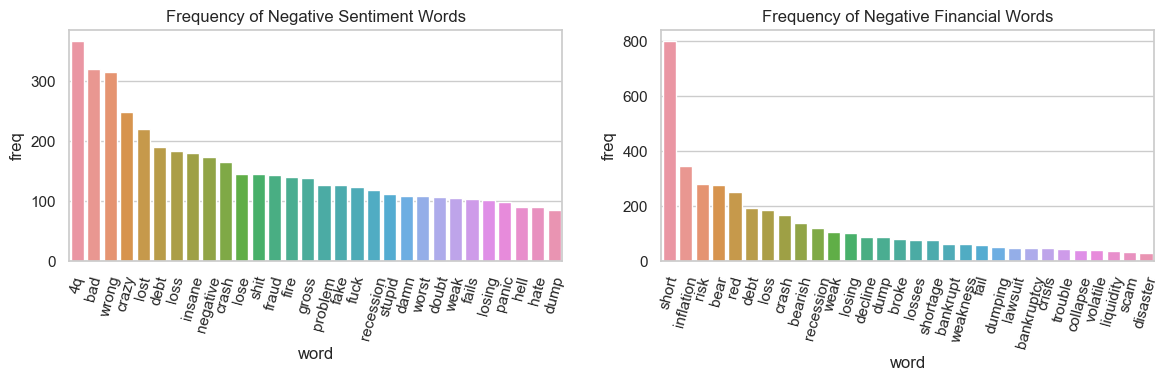

In [ ]:

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 3))

sns.barplot(negative_words_freq[:30],x = 'word',y = 'freq',ax = axs[0])
plt.title('Frequency of Negative Sentiment Words')
axs[0].set_title('Frequency of Negative Sentiment Words')
axs[0].tick_params(axis='x', rotation=75)

sns.barplot(financially_negative_words_freq[:30],x = 'word',y = 'freq',ax = axs[1])
axs[0].set_title('Frequency of Negative Sentiment Words')
axs[1].set_title('Frequency of Negative Financial Words')
axs[1].tick_params(axis='x', rotation=75)


plt.show()

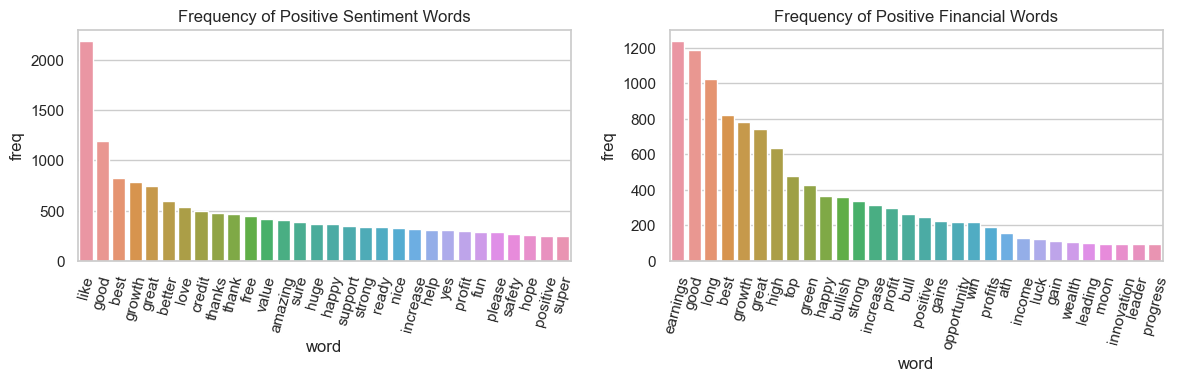

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3))

# Subplot 1: Frequency of Positive Sentiment Words
sns.barplot(data=positive_words_freq[:30], x='word', y='freq', ax=axs[0])
axs[0].set_title('Frequency of Positive Sentiment Words')
axs[0].tick_params(axis='x', rotation=75)

# Subplot 2: Frequency of Positive Financial Words
sns.barplot(data=financially_positive_words_freq[:30], x='word', y='freq', ax=axs[1])
axs[1].set_title('Frequency of Positive Financial Words')
axs[1].tick_params(axis='x', rotation=75)

# Show the subplots
plt.show()

## Prediction Part

### Predicting Close Price Change by Using Sentimental Scores with Different Algorithms

### Numerical Approach

#### Using RoBERTa

In [ ]:
from pycaret.regression import *

In [ ]:
close_and_roberta = stock_vs_tweet_status[['Close Change','roberta_neg','roberta_pos']].dropna().reset_index(drop = True).copy()

In [ ]:
s = setup(close_and_roberta,target = 'Close Change')

,Description,Value
0,Session id,7654
1,Target,Close Change
2,Target type,Regression
3,Original data shape,"(37332, 3)"
4,Transformed data shape,"(37332, 3)"
5,Transformed train set shape,"(26132, 3)"
6,Transformed test set shape,"(11200, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0239,0.0013,0.0363,0.0029,0.0338,1.0723,0.4740
lar,Least Angle Regression,0.0239,0.0013,0.0363,0.0029,0.0338,1.0723,0.0210
br,Bayesian Ridge,0.0239,0.0013,0.0363,0.0029,0.0338,1.0706,0.0220
ridge,Ridge Regression,0.0239,0.0013,0.0363,0.0029,0.0338,1.0723,0.0220
omp,Orthogonal Matching Pursuit,0.0239,0.0013,0.0363,0.0021,0.0337,1.0626,0.0200
llar,Lasso Least Angle Regression,0.0237,0.0013,0.0363,-0.0009,0.0343,1.0151,0.0210
dummy,Dummy Regressor,0.0237,0.0013,0.0363,-0.0009,0.0343,1.0151,0.0210
en,Elastic Net,0.0237,0.0013,0.0363,-0.0009,0.0343,1.0151,0.0190
lasso,Lasso Regression,0.0237,0.0013,0.0363,-0.0009,0.0343,1.0151,0.3310
gbr,Gradient Boosting Regressor,0.0240,0.0013,0.0363,-0.0011,0.0336,1.1064,0.6840


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

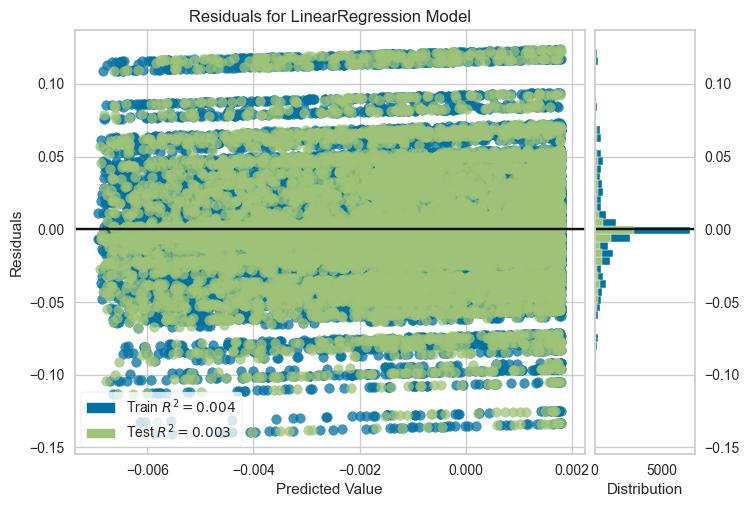

In [ ]:
plot_model(best)

In [ ]:
pred_holdout = predict_model(best).sort_index()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0242,0.0013,0.0366,0.0035,0.0341,1.0768


In [ ]:
pred_holdout

,roberta_neg,roberta_pos,Close Change,prediction_label
2,0.098909,0.062938,-0.068101,-0.001781
6,0.909005,0.008455,-0.068101,-0.006495
15,0.009072,0.186834,-0.068101,-0.000875
18,0.019582,0.232570,-0.068101,-0.000785
19,0.012042,0.701090,-0.068101,0.000782
...,...,...,...,...
37321,0.003214,0.875730,-0.000335,0.001400
37323,0.053998,0.064475,-0.000335,-0.001525
37326,0.332249,0.082553,-0.000335,-0.003024
37327,0.004423,0.966521,-0.000335,0.001689


In [ ]:
pred_holdout['prediction_scaled'] = scaler.fit_transform(pred_holdout['prediction_label'].values.reshape(-1, 1))
pred_holdout['close_scaled'] = scaler.fit_transform(pred_holdout['Close Change'].values.reshape(-1, 1))

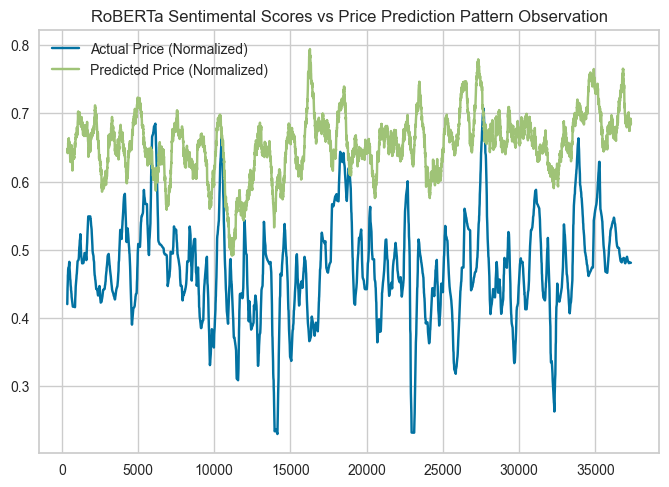

In [ ]:
pred_holdout['close_scaled'].rolling(window = 128).mean().plot(label = "Actual Price (Normalized)").set_title("RoBERTa Sentimental Scores vs Price Prediction Pattern Observation")
pred_holdout['prediction_scaled'].rolling(window = 128).mean().plot(label = "Predicted Price (Normalized)")
plt.legend()
plt.show()

#### Using Vader

In [ ]:
from pycaret.regression import *

In [ ]:
close_and_compound = stock_vs_tweet_status[['Close Change','compound']].dropna().reset_index(drop = True)

In [ ]:
s = setup(close_and_compound,target = 'Close Change')

,Description,Value
0,Session id,6387
1,Target,Close Change
2,Target type,Regression
3,Original data shape,"(37332, 2)"
4,Transformed data shape,"(37332, 2)"
5,Transformed train set shape,"(26132, 2)"
6,Transformed test set shape,"(11200, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0238,0.0013,0.0364,0.0002,0.0344,1.0223,0.0190
lar,Least Angle Regression,0.0238,0.0013,0.0364,0.0002,0.0344,1.0223,0.0170
omp,Orthogonal Matching Pursuit,0.0238,0.0013,0.0364,0.0002,0.0344,1.0223,0.0170
br,Bayesian Ridge,0.0238,0.0013,0.0364,0.0002,0.0344,1.0211,0.0180
ridge,Ridge Regression,0.0238,0.0013,0.0364,0.0002,0.0344,1.0223,0.0170
llar,Lasso Least Angle Regression,0.0238,0.0013,0.0364,-0.0004,0.0345,1.0051,0.0160
dummy,Dummy Regressor,0.0238,0.0013,0.0364,-0.0004,0.0345,1.0051,0.0160
en,Elastic Net,0.0238,0.0013,0.0364,-0.0004,0.0345,1.0051,0.0170
lasso,Lasso Regression,0.0238,0.0013,0.0364,-0.0004,0.0345,1.0051,0.0180
gbr,Gradient Boosting Regressor,0.0239,0.0013,0.0364,-0.0023,0.0342,1.0441,0.2230


In [ ]:
pred_holdout = predict_model(best).sort_index()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0237,0.0013,0.0365,0.0008,0.0345,1.0240


In [ ]:
pred_holdout

,compound,Close Change,prediction_label
0,0.0772,-0.068101,-0.001101
5,0.0000,-0.068101,-0.001276
6,-0.9359,-0.068101,-0.003393
7,0.2500,-0.068101,-0.000710
9,-0.8625,-0.068101,-0.003227
...,...,...,...
37313,0.7424,-0.000335,0.000404
37316,0.6962,-0.000335,0.000299
37320,0.0000,-0.000335,-0.001276
37322,0.5106,-0.000335,-0.000120


In [ ]:
pred_holdout['prediction_scaled'] = scaler.fit_transform(pred_holdout['prediction_label'].values.reshape(-1, 1))
pred_holdout['close_scaled'] = scaler.fit_transform(pred_holdout['Close Change'].values.reshape(-1, 1))

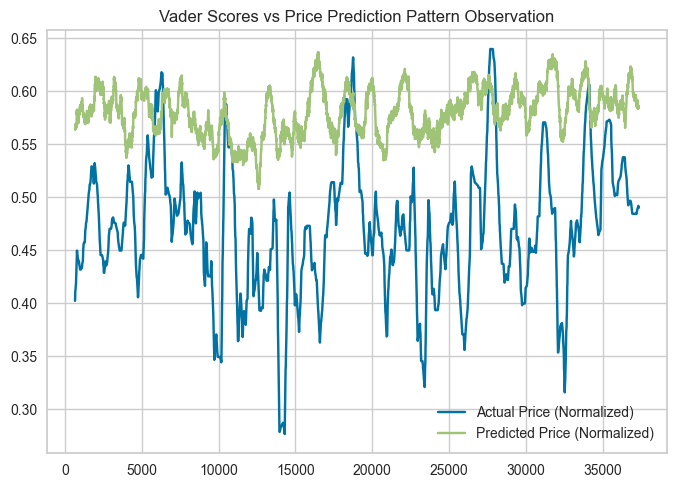

In [ ]:
pred_holdout['close_scaled'].rolling(window = 200).mean().plot(label = "Actual Price (Normalized)").set_title("Vader Scores vs Price Prediction Pattern Observation")
pred_holdout['prediction_scaled'].rolling(window = 200).mean().plot(label = "Predicted Price (Normalized)")
plt.legend()
plt.show()

### Predicting Stock Status using Sentimental Scores and Categorical Features

In [ ]:
time_scale = "7D"

In [ ]:
stock_vs_tweet_status_simplified = resample_tweets_and_scores(time_scale).dropna()

In [ ]:
confidence_coefficient = 0.75

In [ ]:
stock_vs_tweet_status_simplified['roberta_pos'].mean() - stock_vs_tweet_status_simplified['roberta_pos'].std() * confidence_coefficient

0.3520263098180294

In [ ]:
stock_vs_tweet_status_simplified['roberta_neg'].mean() - stock_vs_tweet_status_simplified['roberta_neg'].std() * confidence_coefficient

0.16257842350751162

In [ ]:
positive_limit = stock_vs_tweet_status_simplified['roberta_pos'].mean() - stock_vs_tweet_status_simplified['roberta_pos'].std() * confidence_coefficient
negative_limit = stock_vs_tweet_status_simplified['roberta_neg'].mean() - stock_vs_tweet_status_simplified['roberta_neg'].std() * confidence_coefficient

positive_condition = ((stock_vs_tweet_status_simplified['roberta_pos'] > positive_limit) &(stock_vs_tweet_status_simplified['roberta_neg'] < negative_limit))
neutral_condition = ((stock_vs_tweet_status_simplified['roberta_pos'] <= positive_limit) & (stock_vs_tweet_status_simplified['roberta_neg'] <= negative_limit))
negative_condition = ((stock_vs_tweet_status_simplified['roberta_neg'] > negative_limit) & (stock_vs_tweet_status_simplified['roberta_pos'] < positive_limit) )

labels = ['NEGATIVE', 'NEUTRAL','POSITIVE']

stock_vs_tweet_status_simplified.loc[(~positive_condition) & (~negative_condition),"Tweet Status"] = "NEUTRAL"
stock_vs_tweet_status_simplified.loc[negative_condition,"Tweet Status"] = "NEGATIVE"
stock_vs_tweet_status_simplified.loc[positive_condition,"Tweet Status"] = "POSITIVE"


In [ ]:
labels = ['DECREASED', 'UNCHANGED','INCREASED']
bins = [-float('inf'), -stock_vs_tweet_status_simplified['Close Change'].mean(),stock_vs_tweet_status_simplified['Close Change'].mean(), float('inf')]
stock_vs_tweet_status_simplified['Stock Status'] = pd.cut(stock_vs_tweet_status_simplified['Close Change'], bins=bins, labels=labels, include_lowest=True)
stock_vs_tweet_status_simplified.loc[stock_vs_tweet_status_simplified['Close Change'] == 0,"Stock Status"] = "UNCHANGED"

In [ ]:
from collections import Counter

In [ ]:
stock_mapping = {'INCREASED': 0, 'DECREASED': 1, 'UNCHANGED': 2}
reverse_stock_mapping = {v: k for k, v in stock_mapping.items()}

tweet_mapping = {'POSITIVE': 0, 'NEGATIVE': 1, 'NEUTRAL': 2}
reverse_tweet_mapping = {v: k for k, v in tweet_mapping.items()}

stock_vs_tweet_status_simplified['Stock Status'] = stock_vs_tweet_status_simplified['Stock Status'].map(stock_mapping).dropna()
stock_vs_tweet_status_simplified['Tweet Status'] = stock_vs_tweet_status_simplified['Tweet Status'].map(tweet_mapping).dropna()

In [ ]:
stock_status_simplified_pivot_table = stock_vs_tweet_status_simplified.pivot_table(index = None,values = 'Stock Status',columns='Date',aggfunc='first')
tweet_status_simplified_pivot_table = stock_vs_tweet_status_simplified.pivot_table(index = None,values = 'Tweet Status',columns='Date',aggfunc='first')

In [ ]:
# Define the color palette for the labels
palette = {0: 'g', 1: 'r', 2: 'b'}

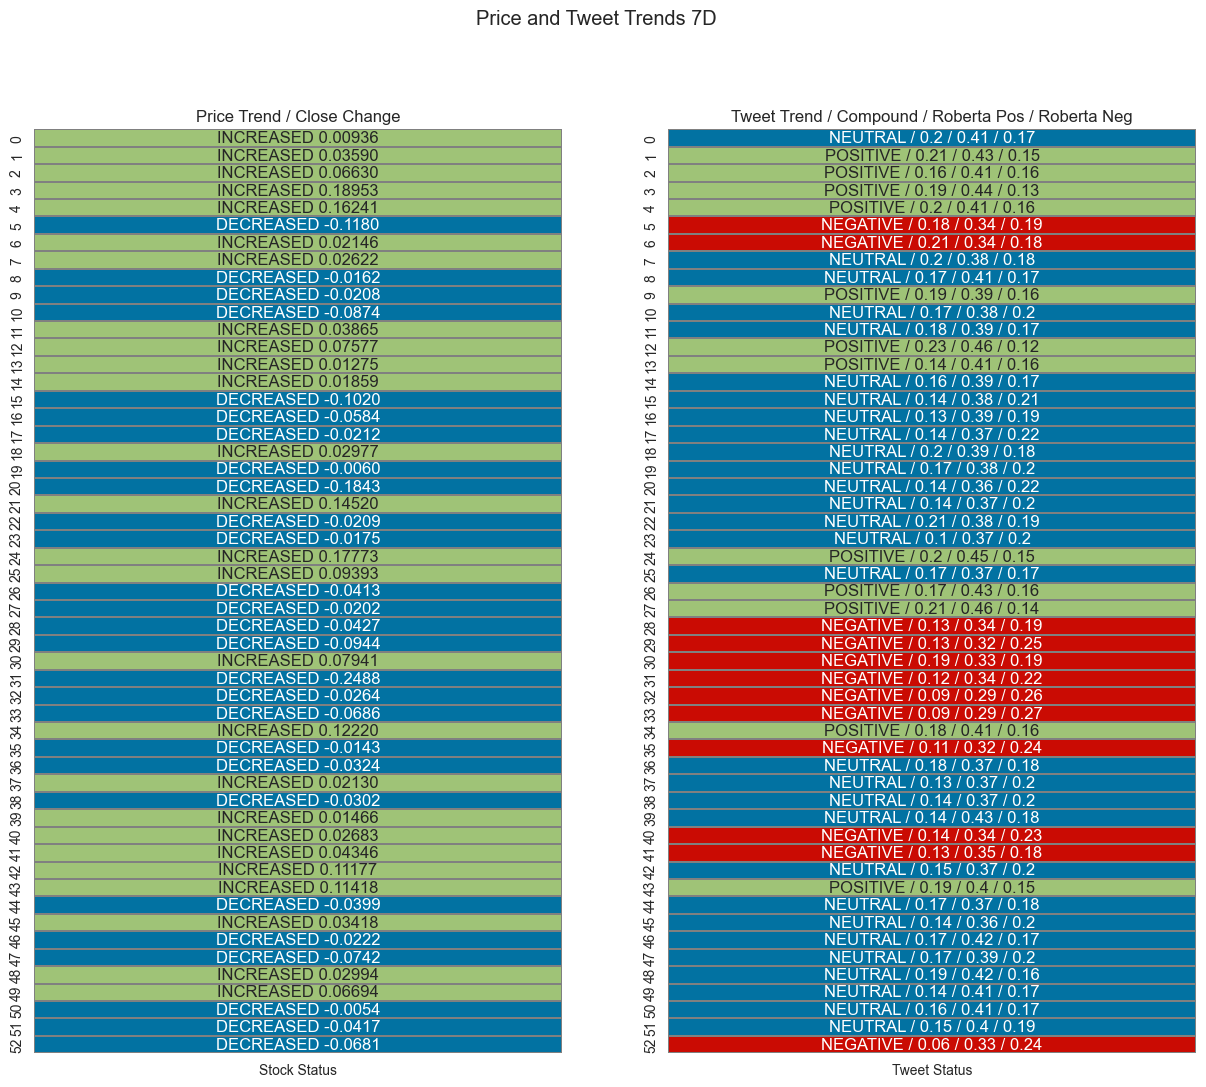

In [ ]:
# Create the heatmap
fig,axs = plt.subplots(1,2,figsize = (15,12))
fig.suptitle(f'Price and Tweet Trends {time_scale}')
axs[0].set_title("Price Trend / Close Change")

close_change_str = stock_vs_tweet_status_simplified['Close Change'].astype(str).values.reshape(-1,1)

stock_annotation_str = stock_vs_tweet_status_simplified['Stock Status'].values.map(reverse_stock_mapping).astype(str).reshape(-1,1)

stock_and_close_annotation = np.core.defchararray.add(stock_annotation_str, ' ' + close_change_str)[::-1]


sns.heatmap(data = stock_status_simplified_pivot_table.T.reset_index(drop = True),  cmap=list(palette.values()), cbar=False, linewidths=0.3, linecolor='grey', annot=stock_and_close_annotation, fmt='',ax = axs[0])
axs[1].set_title("Tweet Trend / Compound / Roberta Pos / Roberta Neg")


tweet_annotation = stock_vs_tweet_status_simplified['Tweet Status'].map(reverse_tweet_mapping).astype(str).values.reshape(-1,1)


tweet_annotation_str = tweet_annotation.astype(str)

compound = stock_vs_tweet_status_simplified['compound']
roberta_pos = stock_vs_tweet_status_simplified['roberta_pos']
roberta_neg = stock_vs_tweet_status_simplified['roberta_neg']

compound_str = np.round(compound, 2).astype(str).values.reshape(-1,1)
roberta_pos_str = np.round(roberta_pos, 2).astype(str).values.reshape(-1,1)
roberta_neg_str = np.round(roberta_neg, 2).astype(str).values.reshape(-1,1)

merged_scores_str = np.concatenate((tweet_annotation_str, compound_str, roberta_pos_str, roberta_neg_str), axis=1)

tweet_score_annotation = np.asarray([' / '.join(row) for row in merged_scores_str]).reshape(-1,1)[::-1]


sns.heatmap(data = tweet_status_simplified_pivot_table.T.reset_index(drop = True),  cmap=list(palette.values()), cbar=False, linewidths=0.3, linecolor='grey' ,annot=tweet_score_annotation , fmt='',ax = axs[1])



plt.show()

In [ ]:
from pycaret.classification import *

In [ ]:
stock_vs_tweet_status_simplified_up_down = stock_vs_tweet_status_simplified[(stock_vs_tweet_status_simplified['Stock Status']==0)
                                                                  |(stock_vs_tweet_status_simplified['Stock Status']==1)][['roberta_pos','roberta_neg','Stock Status','Tweet Status']]

In [ ]:
classification_data = stock_vs_tweet_status_simplified_up_down[['roberta_neg','roberta_pos','compound','Tweet Status','Stock Status']].copy().dropna().reset_index(drop = True)
classification_data_up_down = classification_data[(classification_data['Stock Status'] == 'INCREASED') | (classification_data['Stock Status'] == 'DECREASED')]

In [ ]:
s = setup(stock_vs_tweet_status_simplified_up_down ,target = 'Stock Status')

,Description,Value
0,Session id,7247
1,Target,Stock Status
2,Target type,Binary
3,Original data shape,"(53, 4)"
4,Transformed data shape,"(53, 4)"
5,Transformed train set shape,"(37, 4)"
6,Transformed test set shape,"(16, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = s.compare_models(sort = "f1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7500,0.7000,0.7000,0.7833,0.7100,0.4900,0.5309,0.0610
nb,Naive Bayes,0.7000,0.7250,0.6500,0.7667,0.6800,0.3900,0.4155,0.0160
lda,Linear Discriminant Analysis,0.6667,0.7250,0.6500,0.6667,0.6300,0.3500,0.3655,0.0160
xgboost,Extreme Gradient Boosting,0.6583,0.6875,0.6500,0.6167,0.6133,0.3400,0.3577,0.0310
knn,K Neighbors Classifier,0.6750,0.7375,0.6000,0.6833,0.6100,0.3400,0.3732,0.0240
ridge,Ridge Classifier,0.5167,0.0000,0.7500,0.5500,0.6067,0.0300,0.0500,0.0190
catboost,CatBoost Classifier,0.6000,0.7500,0.6500,0.6000,0.5800,0.2500,0.2655,0.4370
gbc,Gradient Boosting Classifier,0.6000,0.5625,0.6500,0.5667,0.5600,0.2500,0.2809,0.0300
lr,Logistic Regression,0.4833,0.5000,0.7000,0.4500,0.5400,-0.0100,-0.0000,0.0180
qda,Quadratic Discriminant Analysis,0.6167,0.5750,0.5500,0.5667,0.5300,0.2500,0.2655,0.0170


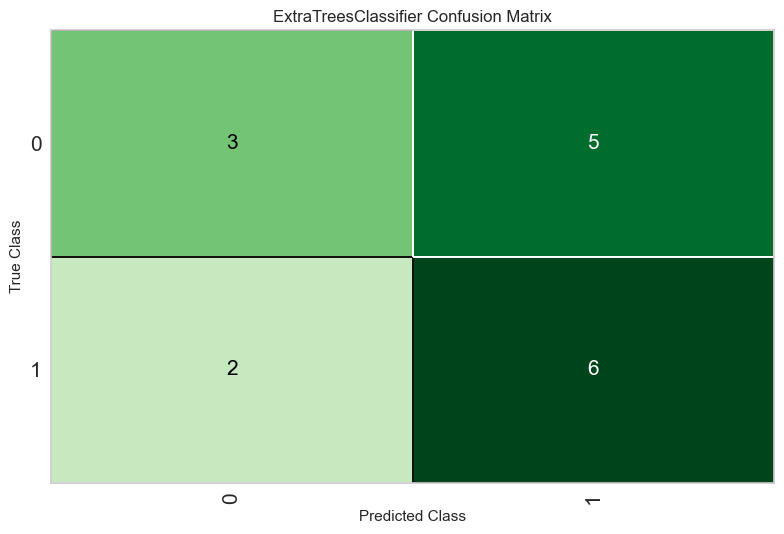

In [ ]:
plot_model(best,plot = 'confusion_matrix')

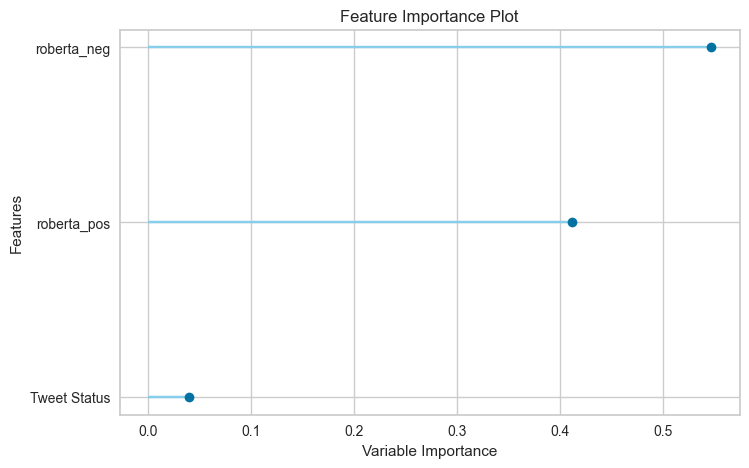

In [ ]:
plot_model(best,plot = 'feature')

In [ ]:
stock_vs_tweet_status_simplified_up_down['Tweet Status'] = stock_vs_tweet_status_simplified_up_down['Tweet Status'].map(reverse_tweet_mapping).astype(str)

#### Hyperparameter tuning and improving accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
classification_data = stock_vs_tweet_status[['roberta_neg','roberta_pos','compound','Tweet Status','Stock Status']].copy().dropna().reset_index(drop = True)
classification_data_up_down = classification_data[(classification_data['Stock Status'] == 'INCREASED') | (classification_data['Stock Status'] == 'DECREASED')]

In [ ]:
classification_data_up_down['Stock Status'] = classification_data_up_down['Stock Status'].map(stock_mapping).dropna()

In [ ]:
classification_data_up_down['Tweet Status'] = classification_data_up_down['Tweet Status'].map(tweet_mapping).dropna()

In [ ]:
classification_data_up_down_scaled = classification_data_up_down.copy()
classification_data_up_down_scaled['roberta_neg'] =scaler.fit_transform(classification_data_up_down['roberta_neg'].values.reshape(-1,1))
classification_data_up_down_scaled['roberta_pos'] =scaler.fit_transform(classification_data_up_down['roberta_pos'].values.reshape(-1,1))
classification_data_up_down_scaled['compound'] =scaler.fit_transform(classification_data_up_down['compound'].values.reshape(-1,1))
classification_data_up_down_scaled['Tweet Status'] =  classification_data_up_down['Tweet Status']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(classification_data_up_down_scaled[['roberta_neg','roberta_pos','compound','Tweet Status']],classification_data_up_down[['Stock Status']])

In [ ]:
model = LogisticRegression()

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,200],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],             # Regularization penalty (L1 or L2)
    'solver': ['liblinear'],             # Solver algorithm for logistic regression
}

# Create a grid search object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best model with the optimal hyperparameters
best_logistic_reg = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_logistic_reg.score(X_test, y_test)
print("Test Accuracy with Best Model: {:.2f}".format(test_accuracy))

Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy with Best Model: 0.53


In [ ]:
best_logistic_reg.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = best_logistic_reg.predict(X_test)

In [ ]:
print(confusion_matrix(y_pred,y_test))

[[1085 1001]
 [ 814  927]]


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54      2086
           1       0.48      0.53      0.51      1741

    accuracy                           0.53      3827
   macro avg       0.53      0.53      0.52      3827
weighted avg       0.53      0.53      0.53      3827



### Applying Sentimental Scores to LSTM Price Prediction Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:
scaler = MinMaxScaler()

lstm_data = resample_tweets_and_scores("1D")[['Close','roberta_neg','roberta_pos']].dropna().reset_index(drop = True)

lstm_data = scaler.fit_transform(np.array(lstm_data))

In [ ]:
train_size = int(len(lstm_data)*0.4)
test_size = len(lstm_data) - train_size

train_data,test_data = lstm_data[0:train_size],lstm_data[train_size:len(price_data)]

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step),1:]
            dataX.append(a)
            dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
time_step = 5
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (X_train.shape[1],2)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [ ]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 50,batch_size = 64,verbose = 1)

Epoch 1/50
3/3 [==============================] - 11s 1s/step - loss: 0.0803 - val_loss: 0.2976
Epoch 2/50
3/3 [==============================] - 0s 58ms/step - loss: 0.0538 - val_loss: 0.2285
Epoch 3/50
3/3 [==============================] - 0s 59ms/step - loss: 0.0321 - val_loss: 0.1538
Epoch 4/50
3/3 [==============================] - 0s 63ms/step - loss: 0.0228 - val_loss: 0.1050
Epoch 5/50
3/3 [==============================] - 0s 53ms/step - loss: 0.0270 - val_loss: 0.1102
Epoch 6/50
3/3 [==============================] - 0s 56ms/step - loss: 0.0243 - val_loss: 0.1353
Epoch 7/50
3/3 [==============================] - 0s 59ms/step - loss: 0.0216 - val_loss: 0.1549
Epoch 8/50
3/3 [==============================] - 0s 69ms/step - loss: 0.0220 - val_loss: 0.1680
Epoch 9/50
3/3 [==============================] - 0s 60ms/step - loss: 0.0235 - val_loss: 0.1707
Epoch 10/50
3/3 [==============================] - 0s 62ms/step - loss: 0.0233 - val_loss: 0.1616
Epoch 11/50
3/3 [=============

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

7/7 [==============================] - 0s 7ms/step


In [ ]:
look_back = 5

In [ ]:
trainPredictPlot = np.empty_like(lstm_data)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict)+look_back,:] = train_predict

In [ ]:
testPredictPlot = np.empty_like(lstm_data)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back)*2 + 1 : len(lstm_data) - 1] = test_predict

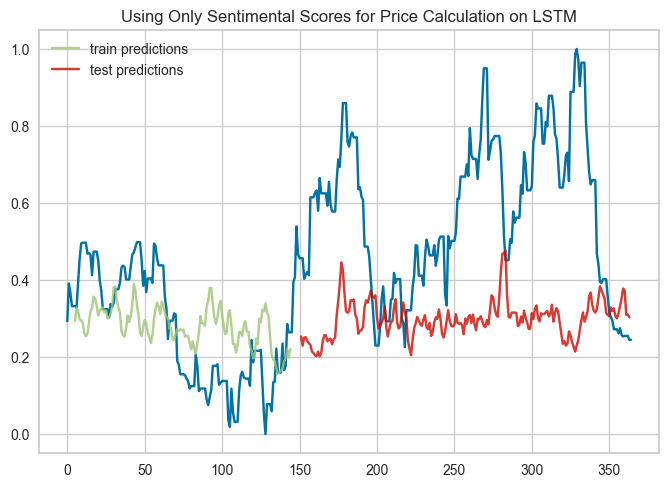

In [ ]:
plt.title('Using Only Sentimental Scores for Price Calculation on LSTM')

plt.plot(scaler.fit_transform(lstm_data)[:,0])
plt.plot(trainPredictPlot[:,0],label = 'train predictions',alpha = 0.8)
plt.plot(testPredictPlot[:,0],label = 'test predictions',alpha = 0.8)
plt.legend()